apm 46.190.66.228_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            360
 Number of total equations: -          320
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             40
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

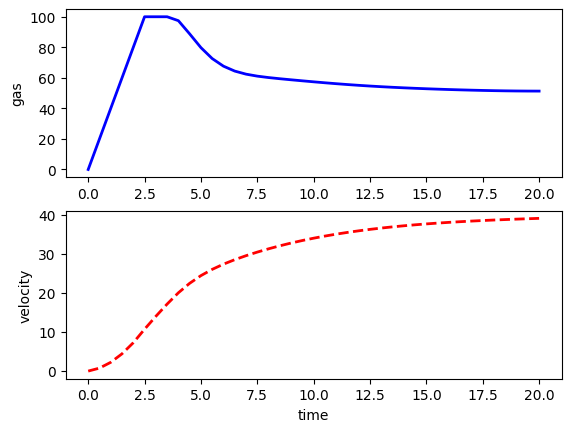

In [4]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()
m.time = np.linspace(0,20,41)

#constants
mass = 500

#Parameters
b = m.Param(value=50)
K = m.Param(value=0.8)

#Manipulated variable
p = m.MV(value=0, lb=0, ub=100)

#Controlled Variable
v = m.CV(value=0)

m.Equation(mass*v.dt() == -v*b + K*b*p)

m.options.IMODE = 6 #control

#MV tuning
p.STATUS = 1 #allow optimizer to change
p.DCOST = 0.1 #smooth out gas pedal movement
p.DMAX = 20 #slow down change of gas pedal

#CV tuning
#setpoint
v.STATUS = 1 #add the SP to the objective
m.options.CV_TYPE = 2 #L2 norm
v.SP = 40 #set point
v.TR_INIT = 1 #setpoint trajectory
v.TAU = 5 #time constant of setpoint trajectory

#%% Solve

m.solve()

#%% Plot solution
plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,p.value,'b-',lw=2)
plt.ylabel('gas')
plt.subplot(2,1,2)
plt.plot(m.time,v.value,'r--',lw=2)
plt.ylabel('velocity')
plt.xlabel('time')
plt.show()

In [5]:
import pandas as pd

df = pd.DataFrame({'time':m.time,'gas':p.value,'velocity':v.value})
df

,time,gas,velocity
0,0.0,0.000000,0.000000
1,0.5,20.000000,0.761905
2,1.0,40.000000,2.249433
3,1.5,60.000001,4.428032
4,2.0,80.000001,7.264792
5,2.5,100.000000,10.728373
6,3.0,100.000000,14.027022
7,3.5,100.000000,17.168593
8,4.0,97.430857,20.062692
9,4.5,88.787968,22.489725
